In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!gdown 161u8UTzjInakN1I2w_D3tS4VSoYsRZqN

Downloading...
From: https://drive.google.com/uc?id=161u8UTzjInakN1I2w_D3tS4VSoYsRZqN
To: /content/aerofit_treadmill.txt
100% 7.28k/7.28k [00:00<00:00, 16.5MB/s]


In [ ]:
df=pd.read_csv('aerofit_treadmill.txt')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

there are no null values in our data

<Axes: xlabel='Product', ylabel='Income'>

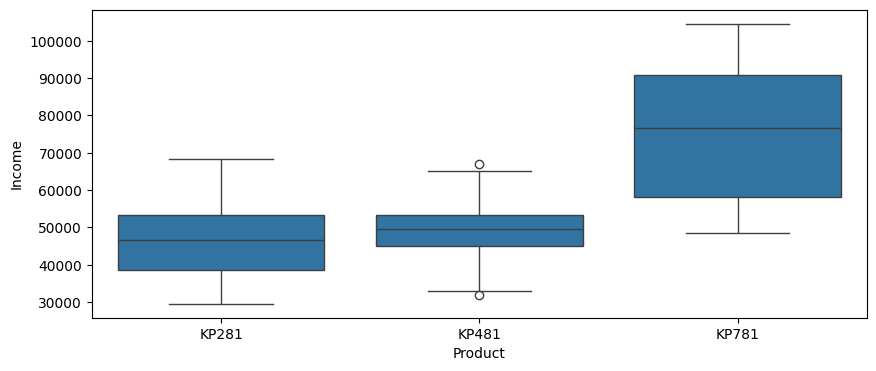

In [ ]:
plt.figure(figsize=(10,4))

sns.boxplot(x=df['Product'],y=df['Income'])

Insight- Above boxplot shows that people with higher income(above 60k) seems to buy higher variant(KP781) and people with lesser income prefer variants KP281 and KP481

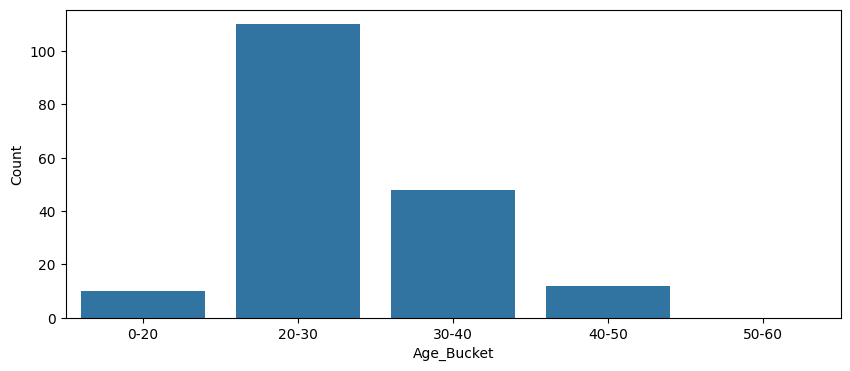

In [ ]:
df['Age_Bucket'] = pd.cut(df['Age'], bins=[10,20, 30, 40, 50, 60], labels=['0-20','20-30', '30-40', '40-50', '50-60'])
age_count=df.groupby('Age_Bucket')['Age_Bucket'].count().reset_index(name='Count').sort_values(by='Age_Bucket')
plt.figure(figsize=(10,4))
sns.barplot(x=age_count['Age_Bucket'],y=age_count['Count'])
plt.show()

above graph shows that people between 20-30 seems to buy threadmill more than any other age range

<Axes: xlabel='Product', ylabel='count'>

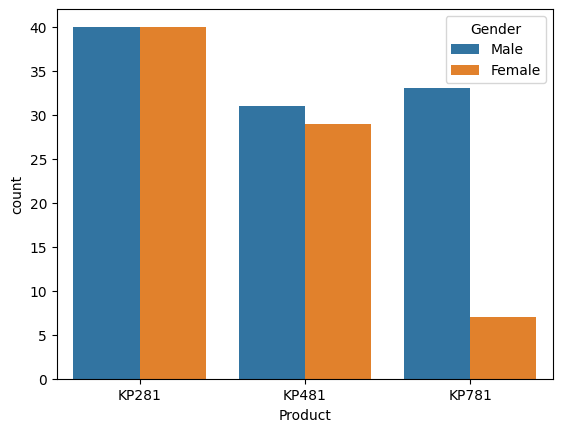

In [ ]:
sns.countplot(x=df['Product'],hue=df['Gender'])

Above graph shows that more males prefer variant KP781

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bucket
0,KP281,18,Male,14,Single,3,4,29562,112,0-20
1,KP281,19,Male,15,Single,2,3,31836,75,0-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,0-20
3,KP281,19,Male,12,Single,3,3,32973,85,0-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,0-20


<Axes: xlabel='MaritalStatus', ylabel='count'>

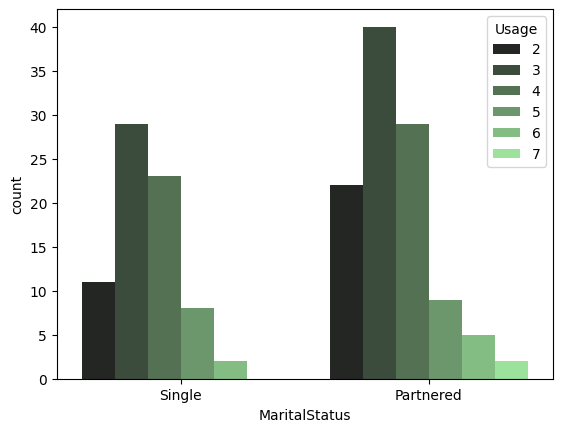

In [ ]:
sns.countplot(x=df['MaritalStatus'],palette ='dark:lightgreen',hue=df['Usage'])

Person who are married seems to buy threadmills more than singles and also usage seems to increase(Some of the married persons excercise all 7days in a week)

<Axes: xlabel='Miles', ylabel='Income'>

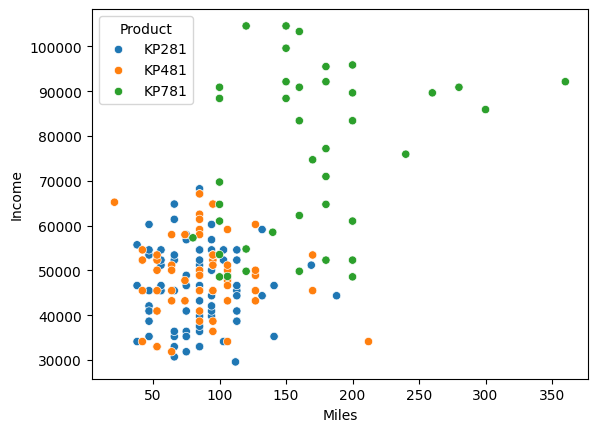

In [ ]:
sns.scatterplot(x=df['Miles'],y=df['Income'],hue=df['Product'])

above scatterplot shows that people buying high variant uses the threadmill more(more miles)

<Axes: xlabel='Gender', ylabel='Income'>

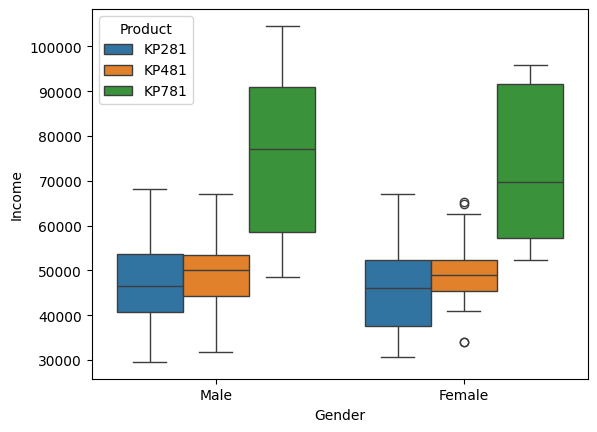

In [ ]:
sns.boxplot(data=df,x='Gender',y='Income',hue='Product')

Above plot shows that people with higher income prefers high variant irrespective of gender


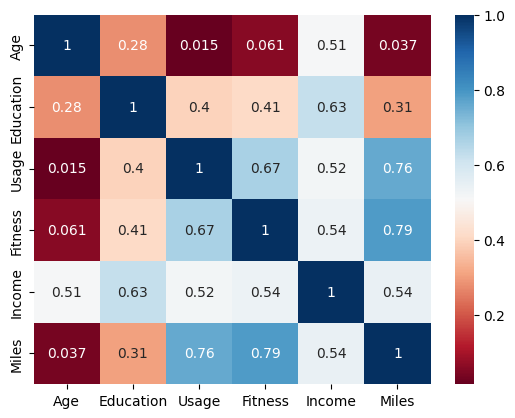

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='RdBu')
plt.yticks(rotation=90)
plt.show()

above heatmap shows
1.people who use threadmill more is more fit
2.People who runs more miles  is fit
3.People with higher education has more income


In [ ]:
pd.crosstab(df['Gender'],df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
round(pd.crosstab(df['Gender'],df['Product'],margins=True,normalize='index')*100,2)

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


Above table shows that nearly 45% of customers prefer basic variant while only 22% buys high variant

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bucket
0,KP281,18,Male,14,Single,3,4,29562,112,0-20
1,KP281,19,Male,15,Single,2,3,31836,75,0-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,0-20
3,KP281,19,Male,12,Single,3,3,32973,85,0-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,0-20


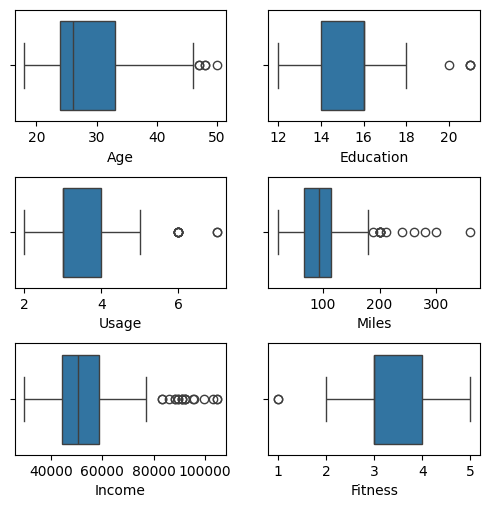

In [ ]:
fig,axis=plt.subplots(figsize=(6,5),nrows=3,ncols=2)
plt.subplots_adjust(top=1.0,hspace=0.5)

sns.boxplot(data=df,x="Age",ax=axis[0,0])
sns.boxplot(data=df,x="Education",ax=axis[0,1])
sns.boxplot(data=df,x="Usage",ax=axis[1,0])
sns.boxplot(data=df,x="Miles",ax=axis[1,1])
sns.boxplot(data=df,x="Income",ax=axis[2,0])
sns.boxplot(data=df,x="Fitness",ax=axis[2,1])
plt.show()

from the above boxplot it is clear that Miles and Income has more outliers compared to other data